# Multiple Hypothesis Testing Correction

This script corrects the results using multiple hypothesis testing correction. The correction can be Bonferroni, FDR, max-statistic, or uncorrected (alpha threshold). The results are corrected for multiple hypotheses to reduce the likelihood of a false positive result (a result that's significant when it isn't) due to have many results.

In [1]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

from common.paths import PLS_RESULTS, RIDGE_RESULTS, CROSS_PRED_RESULTS
from common.results import load_results

from multipy.fwer import bonferroni
from multipy.fdr import lsu

## Get data

### Within-Prediction

In [2]:
model = 'ridge'
population = 'healthy'

fn = f'{model}_pts_{population}'
results_folder = RIDGE_RESULTS if model == 'ridge' else PLS_RESULTS
df, results_path = load_results(fn, results_folder)
pvals = df['P-value']
display(df)

,Model,Population,Target,Bin,Alpha,Score,P-value,Max-stat
0,ridge,healthy,WISC_FSIQ,All,1,0.039798,0.417166,False
1,ridge,healthy,WISC_VSI,All,1,0.161814,0.107784,False
2,ridge,healthy,WISC_VCI,All,9901,0.196705,0.051896,False
3,ridge,healthy,WISC_FRI,All,1,-0.072839,0.734531,False
4,ridge,healthy,WISC_WMI,All,9901,0.116987,0.213573,False
5,ridge,healthy,WISC_PSI,All,1,-0.056080,0.698603,False


### Cross-Prediction

In [3]:
fn = 'ridge_pts_age_cross_prediction (consistent)'
# fn = 'ridge_pts_age_cross_prediction_bin_two_equal_samples'
df, results_path = load_results(fn, CROSS_PRED_RESULTS)
df = df.reset_index(drop=True)
pvals = df['P-value']
display(df)

,Model,Target,Train,Test,Score,P-value,Population,Num Permutations,FDR,Uncorrected,BFR
0,ridge,WISC_FSIQ,Bin 1,Bin 1,0.265258,0.019960,adhd,500,True,True,False
1,ridge,WISC_FSIQ,Bin 1,Bin 2,0.328246,0.001996,adhd,500,True,True,False
2,ridge,WISC_FSIQ,Bin 1,Bin 3,0.202752,0.015968,adhd,500,True,True,False
3,ridge,WISC_FSIQ,Bin 2,Bin 2,0.351665,0.001996,adhd,500,True,True,False
4,ridge,WISC_FSIQ,Bin 2,Bin 3,0.250487,0.003992,adhd,500,True,True,False
5,ridge,WISC_FSIQ,Bin 2,Bin 1,0.358564,0.001996,adhd,500,True,True,False
6,ridge,WISC_FSIQ,Bin 3,Bin 3,0.105539,0.177645,adhd,500,False,False,False
7,ridge,WISC_FSIQ,Bin 3,Bin 1,0.216069,0.015968,adhd,500,True,True,False
8,ridge,WISC_FSIQ,Bin 3,Bin 2,0.290556,0.001996,adhd,500,True,True,False
9,ridge,WISC_VSI,Bin 1,Bin 1,0.244930,0.017964,adhd,500,True,True,False


## BFR/FDR Correction

In [4]:
a_threshold = 0.05
df['Uncorrected'] = pvals < a_threshold
df['BFR'] = bonferroni(pvals, alpha=a_threshold)
df['FDR'] = lsu(pvals, q=a_threshold)
display(df.round(4))

,Model,Target,Train,Test,Score,P-value,Population,Num Permutations,FDR,Uncorrected,BFR
0,ridge,WISC_FSIQ,Bin 1,Bin 1,0.2653,0.0200,adhd,500,True,True,False
1,ridge,WISC_FSIQ,Bin 1,Bin 2,0.3282,0.0020,adhd,500,True,True,False
2,ridge,WISC_FSIQ,Bin 1,Bin 3,0.2028,0.0160,adhd,500,True,True,False
3,ridge,WISC_FSIQ,Bin 2,Bin 2,0.3517,0.0020,adhd,500,True,True,False
4,ridge,WISC_FSIQ,Bin 2,Bin 3,0.2505,0.0040,adhd,500,True,True,False
5,ridge,WISC_FSIQ,Bin 2,Bin 1,0.3586,0.0020,adhd,500,True,True,False
6,ridge,WISC_FSIQ,Bin 3,Bin 3,0.1055,0.1776,adhd,500,False,False,False
7,ridge,WISC_FSIQ,Bin 3,Bin 1,0.2161,0.0160,adhd,500,True,True,False
8,ridge,WISC_FSIQ,Bin 3,Bin 2,0.2906,0.0020,adhd,500,True,True,False
9,ridge,WISC_VSI,Bin 1,Bin 1,0.2449,0.0180,adhd,500,True,True,False


### Save and update results file

In [7]:
df.to_csv(results_path)

### Get FDR q

In [5]:
m = len(pvals)
sorted_pvals = np.sort(pvals)
qs = [(rank + 1) * 0.05 / m for rank, p in enumerate(sorted_pvals)]
a = pd.DataFrame([(p, q) for p, q in zip(sorted_pvals, qs)])
display(a)

,0,1
0,0.001996,0.000926
1,0.001996,0.001852
2,0.001996,0.002778
3,0.001996,0.003704
4,0.001996,0.004630
5,0.001996,0.005556
6,0.001996,0.006481
7,0.001996,0.007407
8,0.001996,0.008333
9,0.001996,0.009259


## Max Statistic Method

In [6]:
from common.binning import BIN_LABELS, EQUAL_BIN_LABELS
from common.paths import RIDGE_RESULTS, RIDGE_PSCORES, PLS_RESULTS, PLS_PSCORES
from common.results import save_perm_score, load_perm_score, load_results
from common.wisc import WISC_LEVEL

### Merge permutation scores per age bin

In [21]:
%%time

# Only need to run this code block once per model/population to generate merged permutation array
model = 'pls'
population = 'adhd'
pscores = RIDGE_PSCORES if model == 'ridge' else PLS_PSCORES

for bin_label in BIN_LABELS:
    bin_perm_scores = []
    
    for target in WISC_LEVEL[5]:
        perm_score = load_perm_score(f'{model}_{population}_{target}_{bin_label}_perm_scores', pscores)
        bin_perm_scores.append(perm_score)
    
    bin_perm_scores = np.concatenate(bin_perm_scores)
    print(bin_label, bin_perm_scores.shape)
    save_perm_score(bin_perm_scores, f'{model}_{population}_{bin_label}_perm_scores', pscores)

All (3000,)
Bin 1 (3000,)
Bin 2 (3000,)
Bin 3 (3000,)


### Load results (true scores)

In [7]:
model = 'pls'
population = 'adhd'
results = RIDGE_RESULTS if model == 'ridge' else PLS_RESULTS

df, results_path = load_results(f'{model}_pts_{population}', results)
display(df)

,Model,Population,Target,Bin,Score,P-value,FDR,Max-stat
0,pls,adhd,WISC_FSIQ,All,0.373278,0.001996,True,True
1,pls,adhd,WISC_FSIQ,Bin 1,0.238193,0.023952,True,True
2,pls,adhd,WISC_FSIQ,Bin 2,0.368297,0.001996,True,True
3,pls,adhd,WISC_FSIQ,Bin 3,0.093354,0.213573,False,False
4,pls,adhd,WISC_VSI,All,0.281292,0.001996,True,True
5,pls,adhd,WISC_VSI,Bin 1,0.245252,0.013972,True,True
6,pls,adhd,WISC_VSI,Bin 2,0.200747,0.025948,True,True
7,pls,adhd,WISC_VSI,Bin 3,0.116542,0.167665,False,False
8,pls,adhd,WISC_VCI,All,0.365755,0.001996,True,True
9,pls,adhd,WISC_VCI,Bin 1,0.220753,0.021956,True,True


In [12]:
%%time

a_threshold = 0.05
max_stats = pd.Series(dtype='bool')
bin_threshold_scores = {k: None for k in EQUAL_BIN_LABELS}
pscores = RIDGE_PSCORES if model == 'ridge' else PLS_PSCORES

for bin_label in BIN_LABELS:
    bin_perm_scores = load_perm_score(f'{model}_{population}_{bin_label}_perm_scores', pscores)
    threshold_index = int(bin_perm_scores.shape[0] * (1 - a_threshold))
    threshold_score = np.sort(bin_perm_scores)[threshold_index]
    bin_threshold_scores[bin_label] = threshold_score
    
    bin_results = df[df['Bin'] == bin_label]
    max_stats = pd.concat([max_stats, threshold_score < bin_results['Score']])

df['Max-stat'] = max_stats
df.sort_values('Bin')
display(df)

,Model,Population,Target,Bin,Score,P-value,FDR,Max-stat
0,pls,adhd,WISC_FSIQ,All,0.373278,0.001996,True,True
1,pls,adhd,WISC_FSIQ,Bin 1,0.238193,0.023952,True,True
2,pls,adhd,WISC_FSIQ,Bin 2,0.368297,0.001996,True,True
3,pls,adhd,WISC_FSIQ,Bin 3,0.093354,0.213573,False,False
4,pls,adhd,WISC_VSI,All,0.281292,0.001996,True,True
5,pls,adhd,WISC_VSI,Bin 1,0.245252,0.013972,True,True
6,pls,adhd,WISC_VSI,Bin 2,0.200747,0.025948,True,True
7,pls,adhd,WISC_VSI,Bin 3,0.116542,0.167665,False,False
8,pls,adhd,WISC_VCI,All,0.365755,0.001996,True,True
9,pls,adhd,WISC_VCI,Bin 1,0.220753,0.021956,True,True


CPU times: user 14.3 ms, sys: 0 ns, total: 14.3 ms
Wall time: 13.6 ms


### Save and update results file

In [40]:
df.to_csv(results_path)

### Visualize

CPU times: user 371 ms, sys: 7.82 ms, total: 379 ms
Wall time: 377 ms


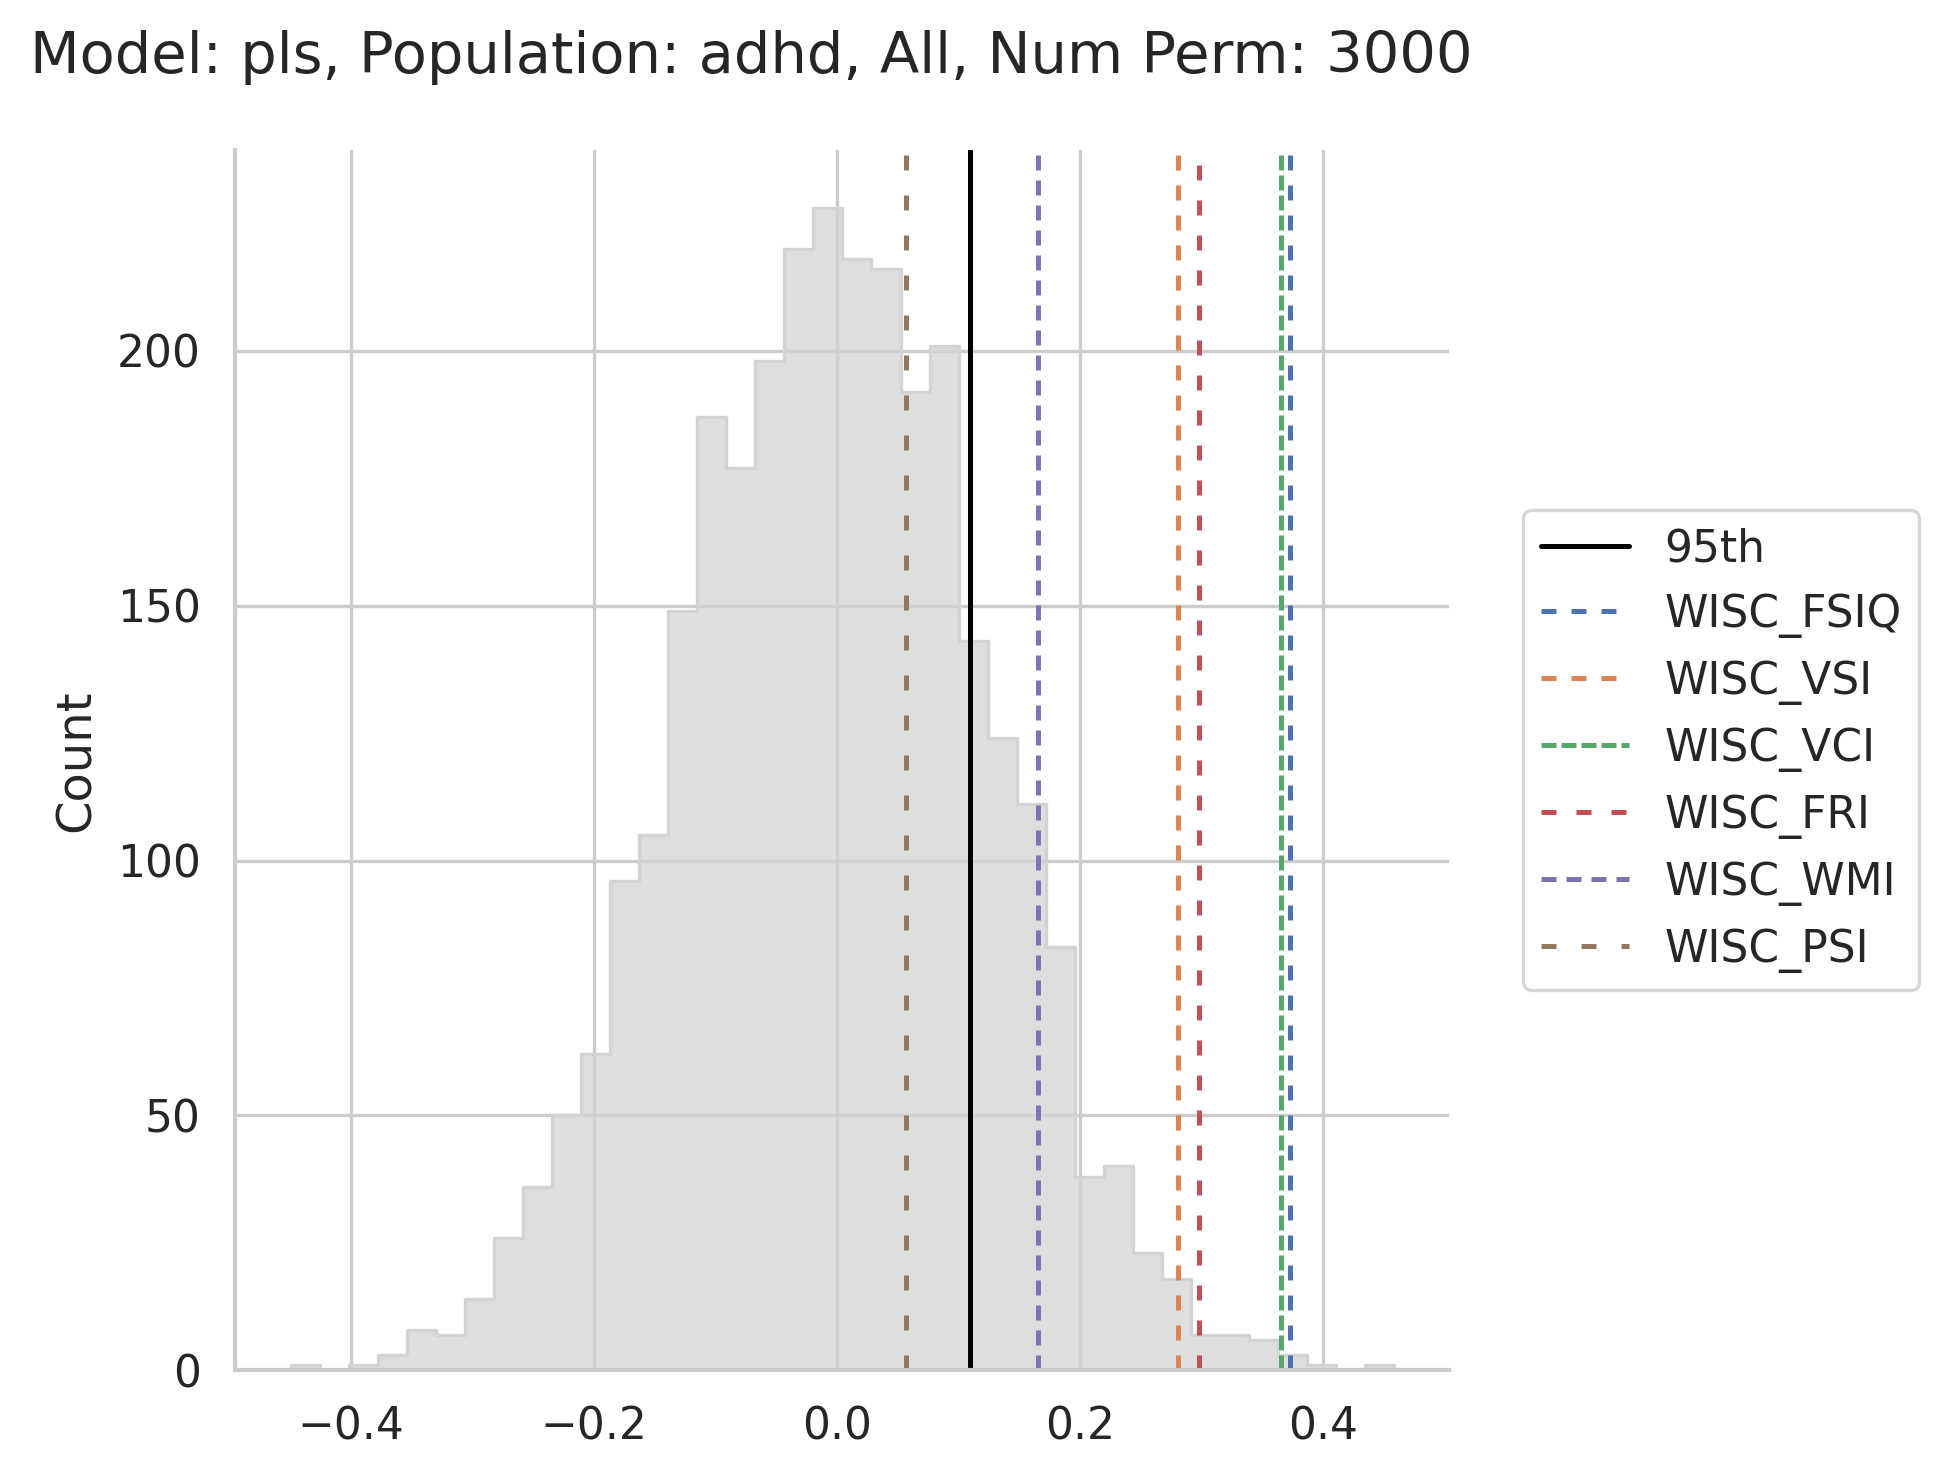

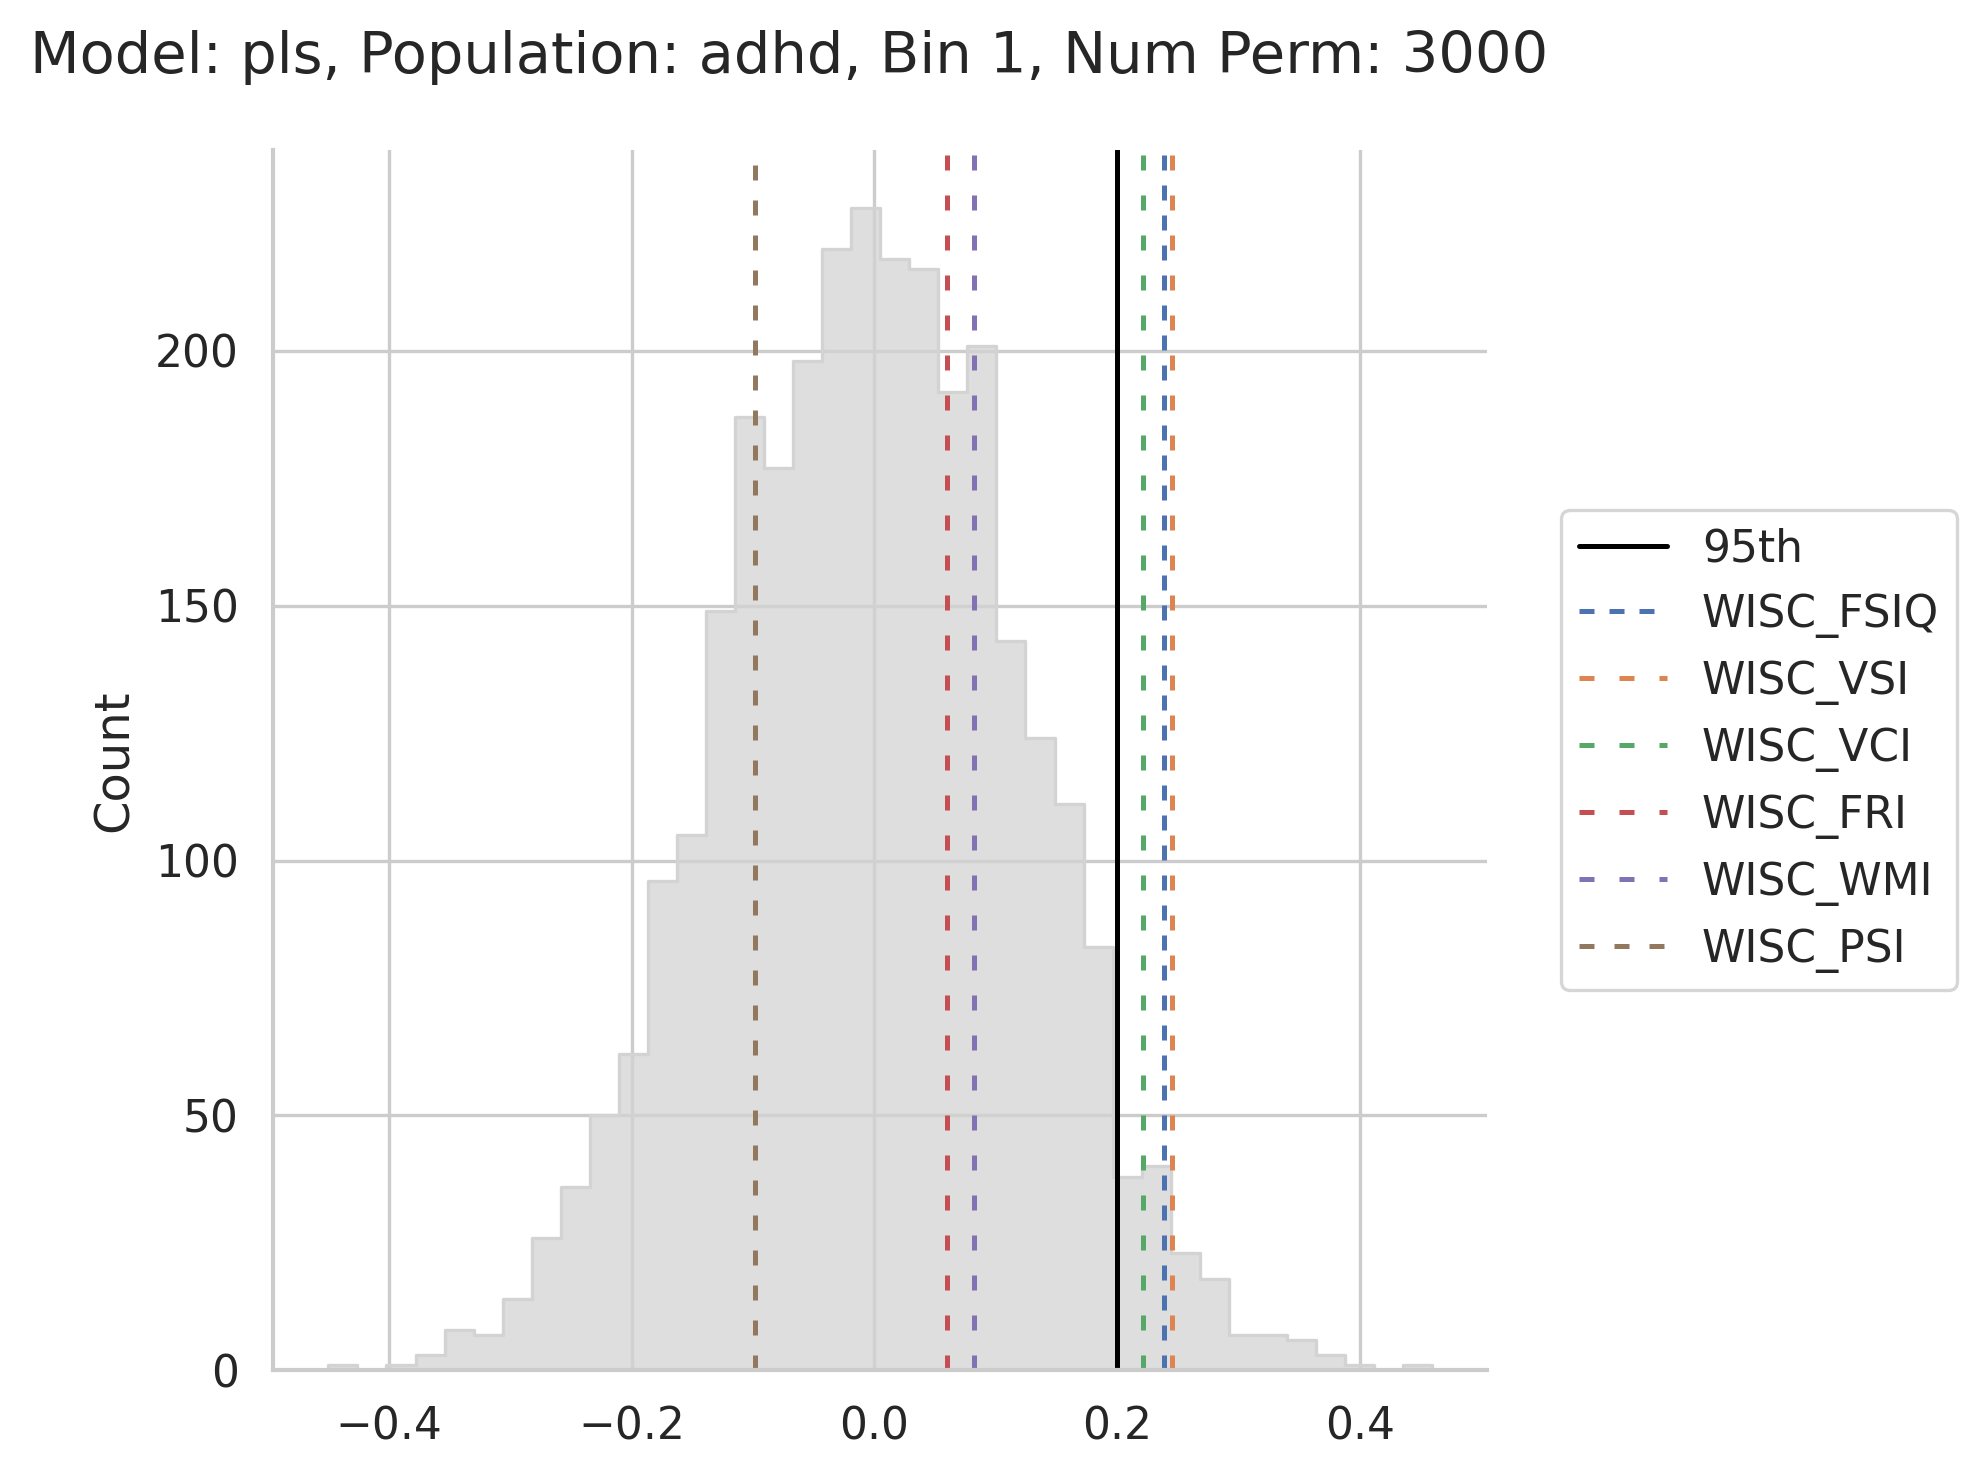

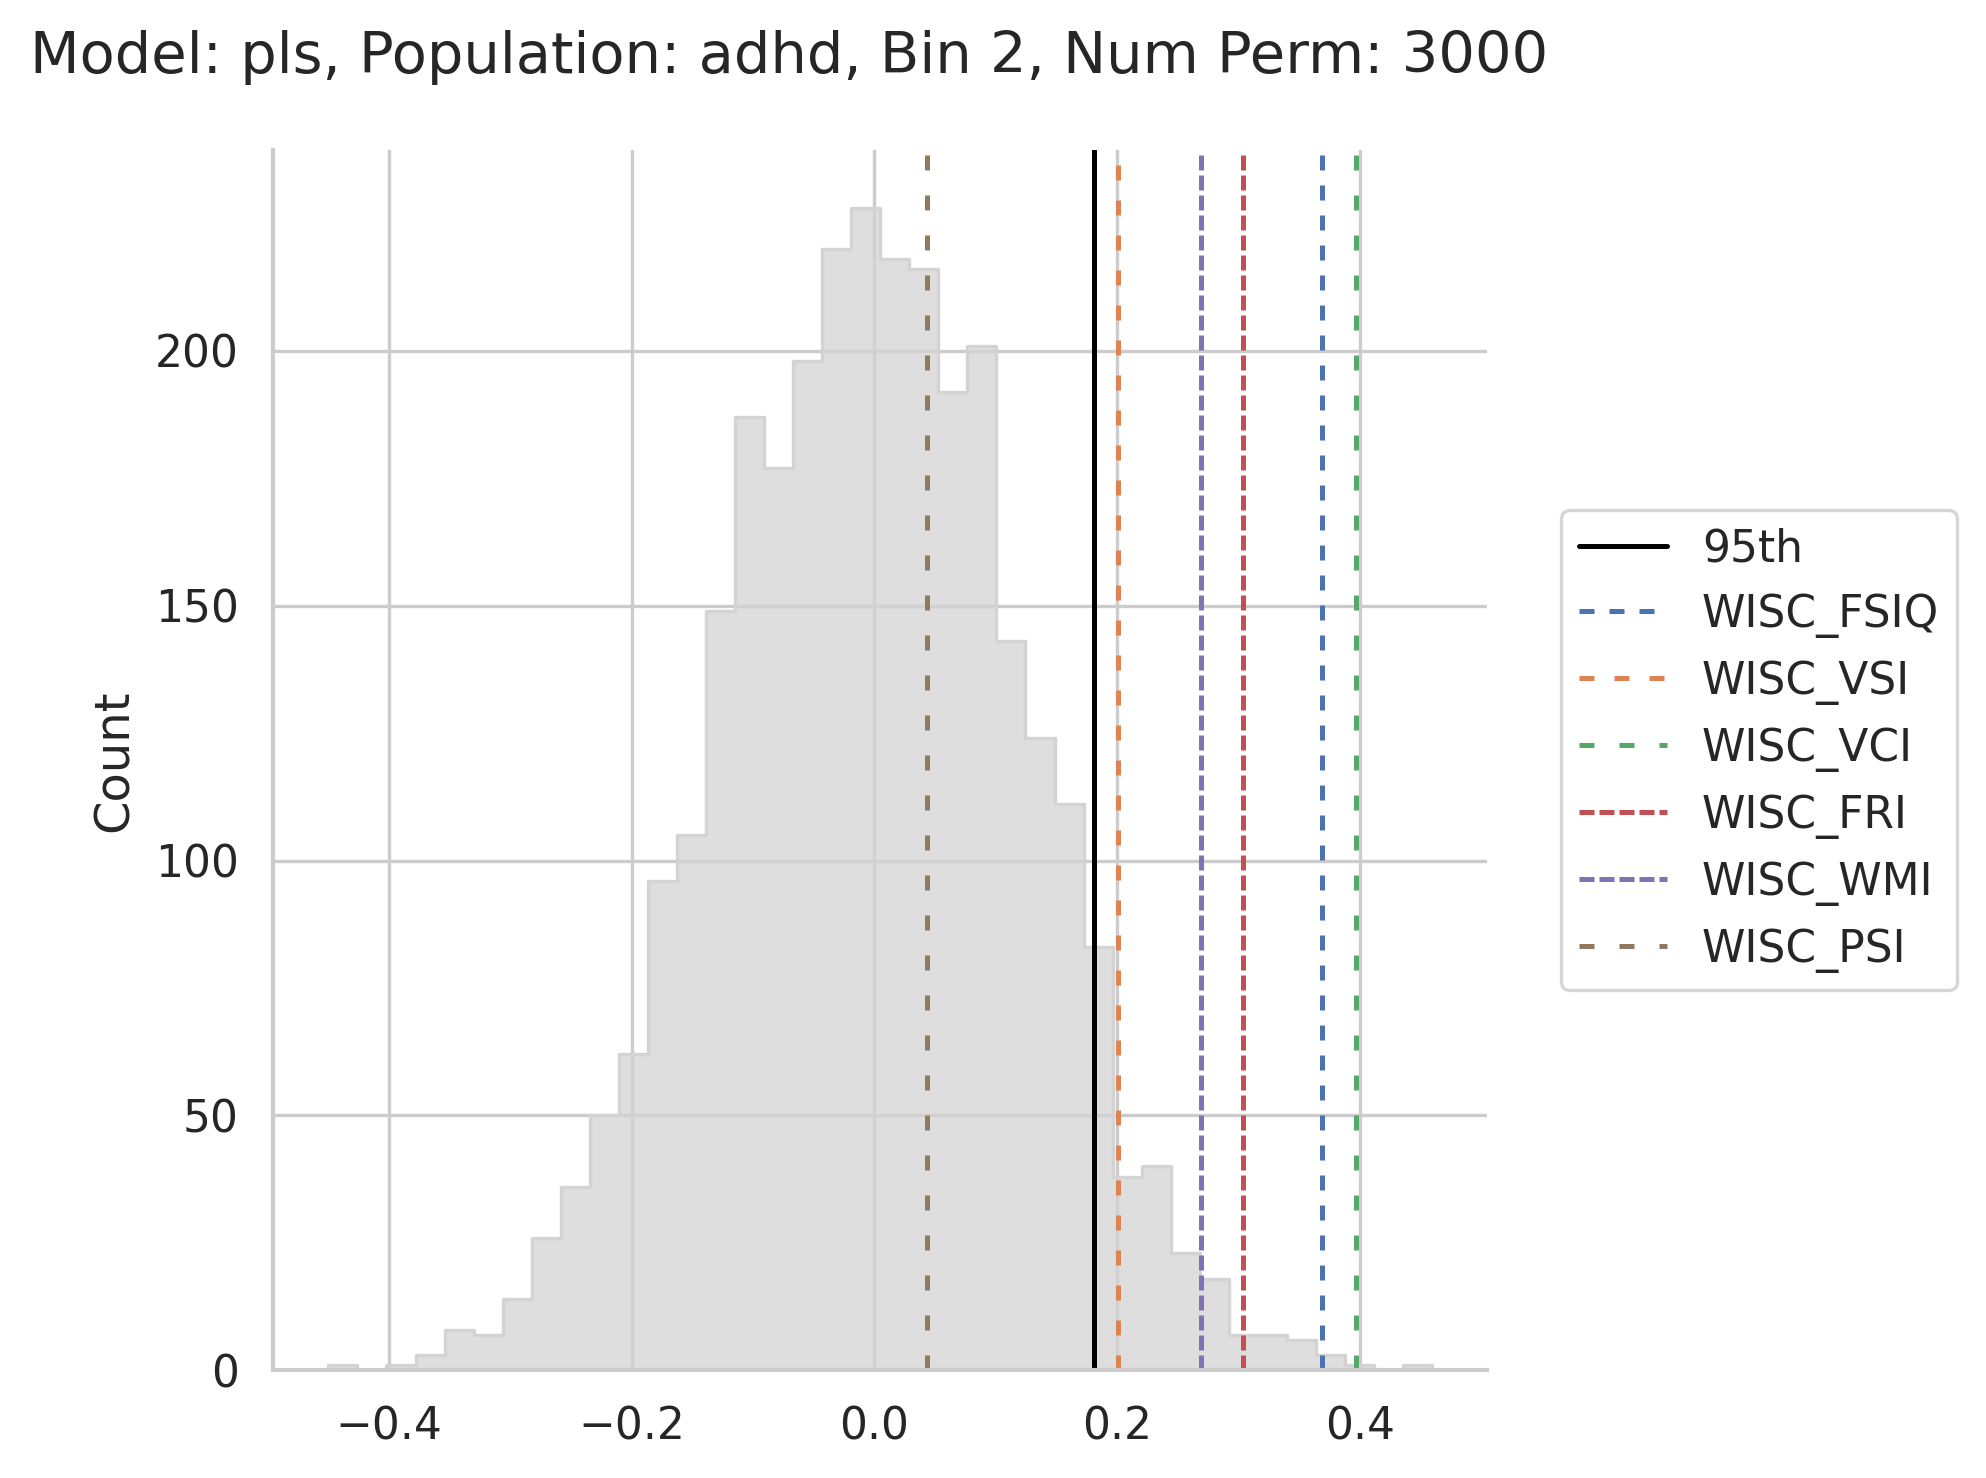

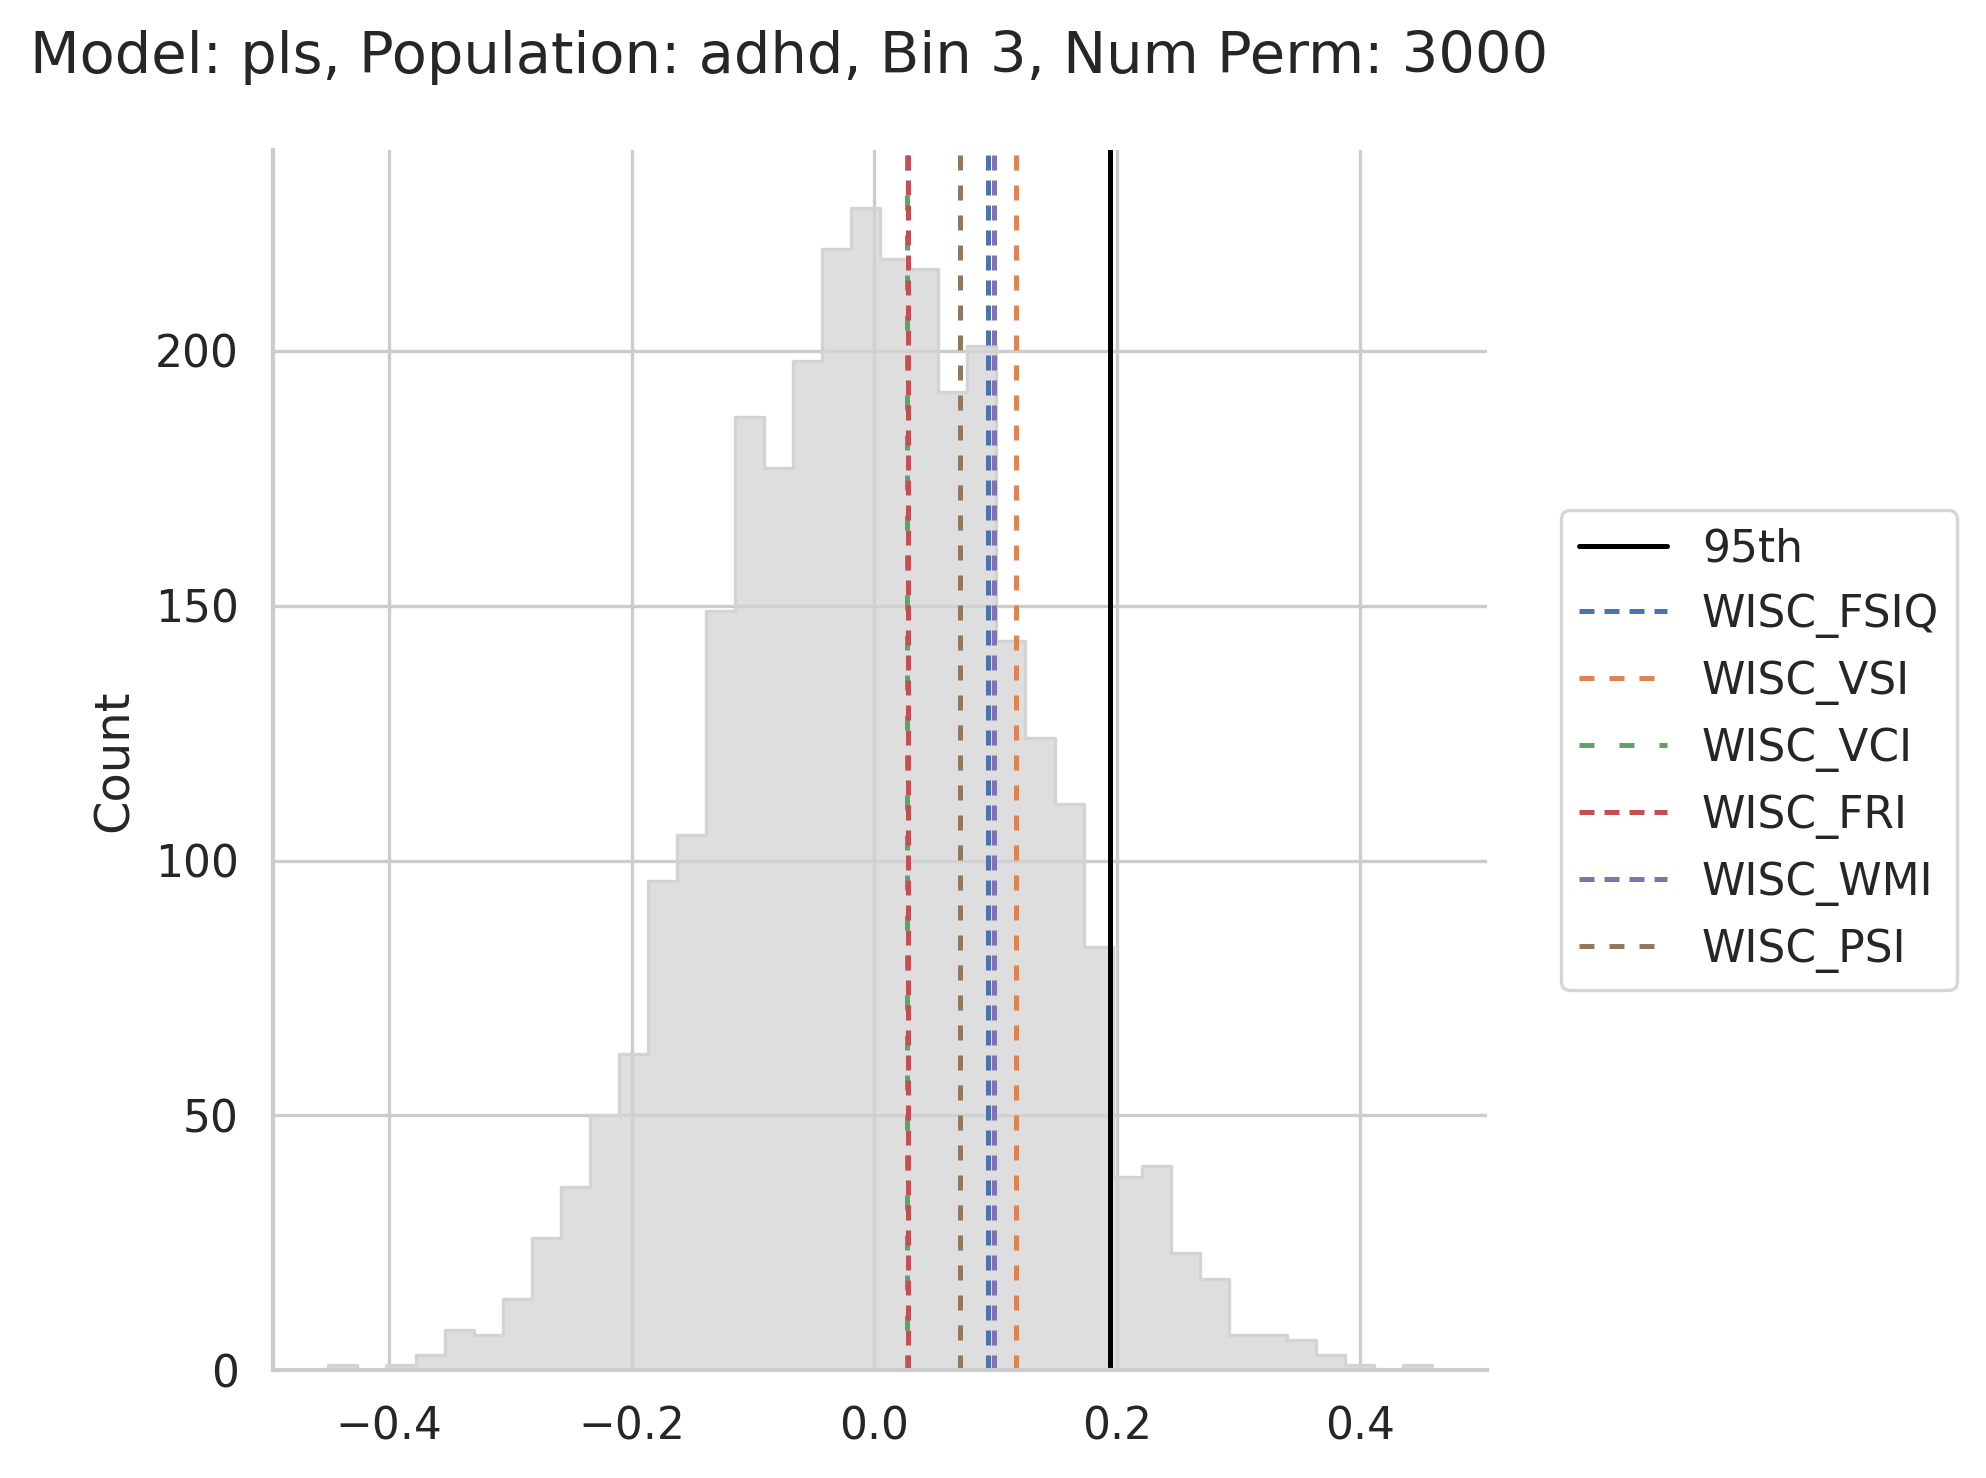

In [13]:
%%time

for bin_label in BIN_LABELS:
    threshold_score = bin_threshold_scores[bin_label]
    
    g = sns.displot(bin_perm_scores, color='lightgrey', element="step")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Model: {model}, Population: {population}, {bin_label}, Num Perm: {bin_perm_scores.shape[0]}')
    g.ax.axvline(threshold_score, label='95th', color='black')
    
    for target_idx, target in enumerate(WISC_LEVEL[5]):
        target_score = df.loc[(df['Bin'] == bin_label) & (df['Target'] == target)]['Score']
        target_score = target_score.to_list()[0]
        g.ax.axvline(target_score, label=target, ls=(
            0, (3, np.random.randint(1, 6))), color=sns.color_palette()[target_idx])
    g.fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))